# Lab 02_2: Transmon Qubit - Floating Type

### developed by Seong Hyeon Park (pajoheji0909@snu.ac.kr)

### Please find the attached homework at the end of this tutorial code

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from qiskit_metal import designs, MetalGUI, Dict

design = designs.DesignPlanar()
design.overwrite_enabled = True

In [3]:
# set the overall layout size (X)
design.chips.main.size.size_x = '3mm'
# set the overall layout size (Y)
design.chips.main.size.size_y = '3mm'
# set the substrate thickness (Z)
design.chips.main.size.size_z = '-400um'

## start GUI of Qiskit-Metal and ANSYS HFSS

In [4]:
# start GUI
gui = MetalGUI(design)

In [5]:
hfss = design.renderers.hfss
# start ANSYS HFSS
hfss.start()

INFO 12:33PM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:33PM [load_ansys_project]: 	Opened Ansys App
INFO 12:33PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 12:33PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/USER/Documents/Ansoft/
	Project:   Project1
INFO 12:33PM [connect_design]: 	Opened active design
	Design:    lab02_floating_transmon_hfss [Solution type: Eigenmode]
INFO 12:33PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:33PM [connect]: 	Connected to project "Project1" and design "lab02_floating_transmon_hfss" 😀 



True

In [6]:
import pyEPR as epr
import qiskit_metal as metal

# set custom substrate materials

In [7]:
newMaterial_name = 'silicon_custom'
newMaterial_permittivity = '11.45'
newMaterial_losstangent = '1e-9'

from pyEPR import ansys, project_info
ans_prj = project_info.ProjectInfo()
oProject = ans_prj.project._project
defmanager = oProject.GetDefinitionManager()

if not defmanager.DoesMaterialExist(newMaterial_name):
    defmanager.AddMaterial(
        [
            "NAME:%s"%(newMaterial_name),
            "CoordinateSystemType:=", "Cartesian",
            "BulkOrSurfaceType:=", 1,
            [
                    "NAME:PhysicsTypes",
                    "set:=", ["Electromagnetic"]
            ],
            "permittivity:=", "%s"%(newMaterial_permittivity),
            "dielectric_loss_tangent:=", "%s"%(newMaterial_losstangent)
        ])

ans_prj.project.release()
ans_prj.desktop.release()
ans_prj.app.release()
ansys.release()

design.chips['main']['material'] = newMaterial_name

INFO 12:33PM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:33PM [load_ansys_project]: 	Opened Ansys App
INFO 12:33PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 12:33PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/USER/Documents/Ansoft/
	Project:   Project1
INFO 12:34PM [connect_design]: 	Opened active design
	Design:    lab02_floating_transmon_hfss [Solution type: Eigenmode]
INFO 12:34PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:34PM [connect]: 	Connected to project "Project1" and design "lab02_floating_transmon_hfss" 😀 



Warning! 6 COM references still alive
Ansys will likely refuse to shut down


# design your qubits!

In [8]:
# there are various in-built qubit types in Qiskit-Metal, you should try it by yourself
from qiskit_metal.qlibrary.qubits.transmon_pocket_6 import TransmonPocket6

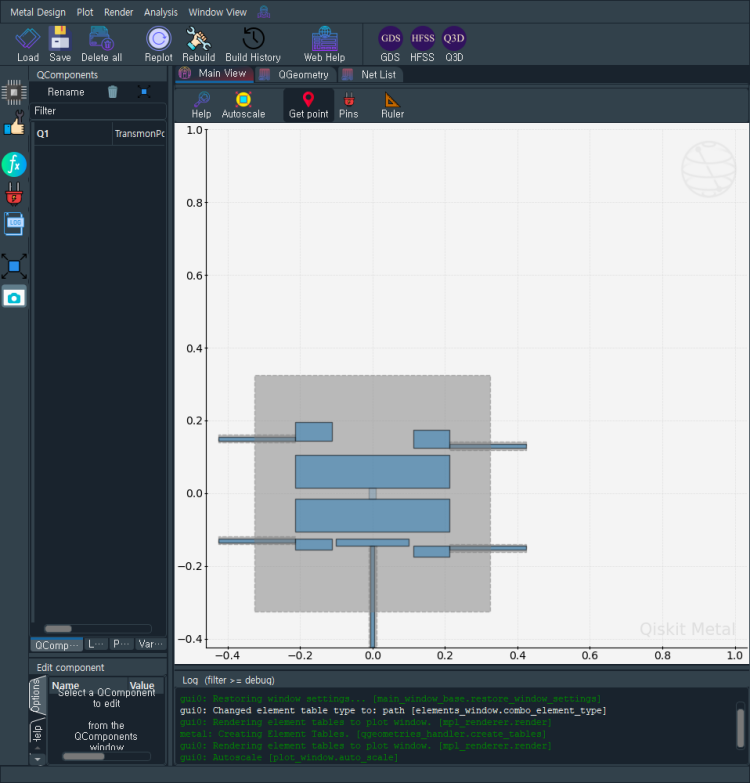

In [9]:
# everytime you need to redefine the component, you should delete the misdefined components
design.delete_all_components()

## Custom options for all the transmons
options = dict(
    # see default options and available options!
    pad_width = '425 um', 
    pad_height = '90 um',
    pad_gap = '30 um',
    pocket_width = '650 um',
    pocket_height = '650um',
    # Adding 4 connectors (see below for defaults)
    connection_pads=dict(
        readout = dict(loc_W=0, loc_H=-1, 
                       pad_height='20 um', pad_width='200 um', pad_gap='20 um'),
        bus1 = dict(loc_W=-1, loc_H=+1, 
                    pad_height='50 um', pad_width='100 um', pad_gap='40 um'),
        bus2 = dict(loc_W=-1, loc_H=-1, 
                    pad_height='30 um', pad_width='100 um', pad_gap='20 um'),
        bus3 = dict(loc_W=+1, loc_H=-1, 
                    pad_height='30 um', pad_width='100 um', pad_gap='40 um'),
        bus4 = dict(loc_W=+1, loc_H=+1, 
                    pad_height='50 um', pad_width='100 um', pad_gap='20 um')
    )
)

## Create a double pad transmon
q1 = TransmonPocket6(design, 'Q1', options = dict(pos_x='0 mm', pos_y='0 mm', **options))

# rebuild the GUI (if not, you can't see the components)
gui.rebuild()

# auto-rescale the GUI
gui.autoscale()

# take a screenshot of the GUI
gui.screenshot()

for simplicity, assume that a qubit has only one coupling structure - capacitive coupling between a readout resonator and a qubit

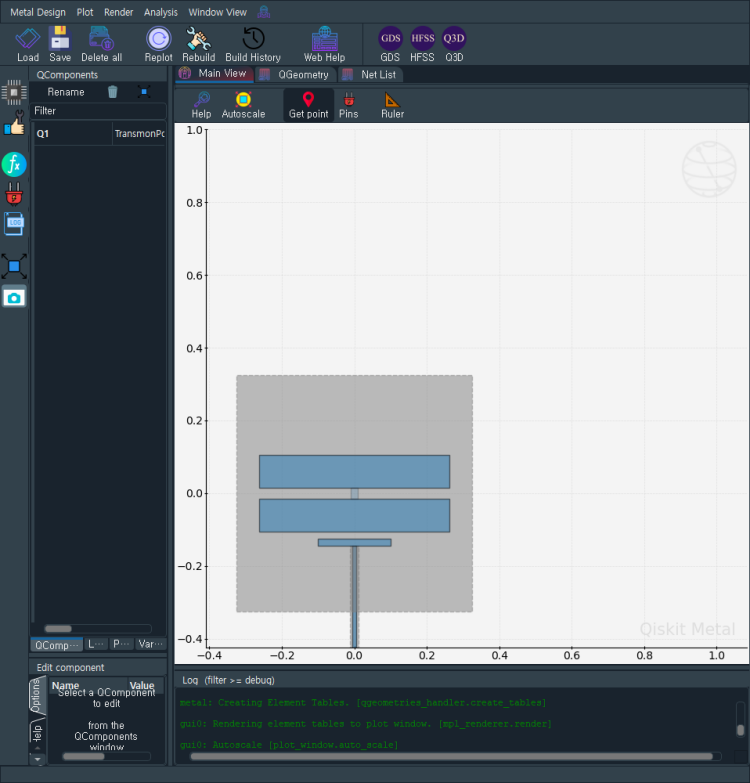

In [10]:
# everytime you need to redefine the component, you should delete the misdefined components
design.delete_all_components()

## Custom options for all the transmons
options = dict(
    # see default options and available options!
    pad_width = '425 um', 
    pad_height = '90 um',
    pad_gap = '30 um',
    pocket_width = '650 um',
    pocket_height = '650um',
    # Adding 4 connectors (see below for defaults)
    connection_pads=dict(
        readout = dict(loc_W=0, loc_H=-1, 
                       pad_height='20 um', pad_width='200 um', pad_gap='20 um')
    ),
    # define the JJ inductance for HFSS renderining
    hfss_inductance = '12 nH',
    hfss_capacitance = '2 fF'
)

## Create a double pad transmon
q1 = TransmonPocket6(design, 'Q1', options = dict(pos_x='0 mm', pos_y='0 mm', **options))

# rebuild the GUI (if not, you can't see the components)
gui.rebuild()

# auto-rescale the GUI
gui.autoscale()

# take a screenshot of the GUI
gui.screenshot()

# Method (1): Capacitance Analysis and LOM derivation using the analysis package - most users

Based on the quasi-lumped models (ZK Minev *et al.*, https://arxiv.org/abs/2103.10344), we can extract the qubit parameters from the capacitance matrix.
You can assume an arbitrary coupling structure's frequency and calculate the corresponding coupling strength and cross-Kerr shift.

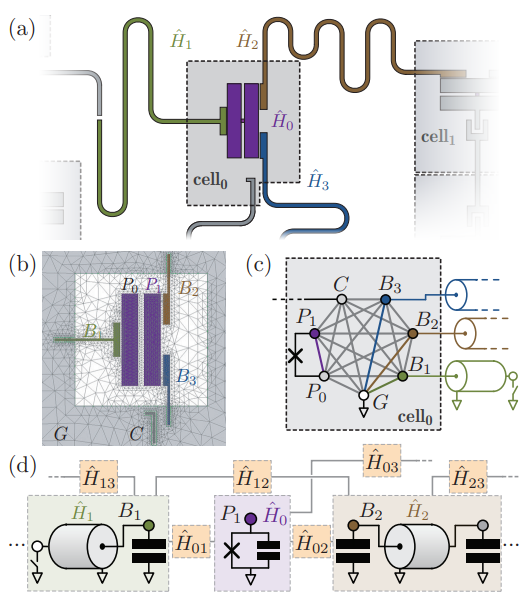

### Capacitance Analysis
Select the analysis you intend to run from the `qiskit_metal.analyses` collection.<br>
Select the design to analyze and the tool to use for any external simulation

In [11]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")

In [12]:
# example: update single setting
c1.sim.setup.max_passes = 20
c1.sim.setup.freq_ghz = 5

# example: update multiple settings
c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5,
 'save_fields': False,
 'enabled': True,
 'max_passes': 20,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [13]:
# you should define the open terminations, where coupling structures of a qubit end
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'readout')])

# c1.setup.run <- direct access
c1.sim.print_run_args()

INFO 12:34PM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:34PM [load_ansys_project]: 	Opened Ansys App
INFO 12:34PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 12:34PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/USER/Documents/Ansoft/
	Project:   Project1
INFO 12:34PM [connect_design]: 	Opened active design
	Design:    lab02_floating_transmon_hfss [Solution type: Eigenmode]
INFO 12:34PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:34PM [connect]: 	Connected to project "Project1" and design "lab02_floating_transmon_hfss" 😀 

INFO 12:34PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 12:34PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 12:34PM [analyze]: Analyzing setup Setup
INFO 12:34PM [get_matrix]: Exporting matrix data to (C:\Users\USER\AppData\Local\Temp\tmpjmfjv9o8.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH",

This analysis object run with the following kwargs:
{'name': None, 'components': ['Q1'], 'open_terminations': [('Q1', 'readout')], 'box_plus_buffer': True}



In [14]:
c1.sim.capacitance_matrix

,ground_main_plane,pad_bot_Q1,pad_top_Q1,readout_connector_pad_Q1
ground_main_plane,185.76616,-46.89531,-52.40658,-32.91874
pad_bot_Q1,-46.89531,105.69415,-38.34360,-17.80049
pad_top_Q1,-52.40658,-38.34360,95.95631,-2.24658
readout_connector_pad_Q1,-32.91874,-17.80049,-2.24658,53.89120


## do quasi-LOM analysis 

Using capacitance matrices obtained from each pass, save the many parameters of the Hamiltonian of the system. `get_lumped_oscillator()` operates on 4 setup parameters: <br><br>
Lj: float <br>
Cj: float <br>
fr: Union[list, float] <br>
fb: Union[list, float] <br>

In [15]:
c1.setup.junctions = Dict({'Lj': 12, 'Cj': 2}) # Lj unit: nH and Cj unit: fF

c1.setup.freq_readout = 7.0 # assume a readout resonator's frequency = 7.0 GHz
c1.setup.freq_bus = []      # if there is additional coupling bus resonators, you should define their frequencies

c1.run_lom()
c1.lumped_oscillator_all

[1, 2] [3]
Predicted Values

Transmon Properties
f_Q 5.199487 [GHz]
EC 276.837850 [MHz]
EJ 13.616300 [GHz]
alpha -318.422271 [MHz]
dispersion 12.545879 [KHz]
Lq 11.995161 [nH]
Cq 69.969580 [fF]
T1 104.715958 [us]

**Coupling Properties**

tCqbus1 6.933523 [fF]
gbus1_in_MHz 98.424234 [MHz]
χ_bus1 -1.659614 [MHz]
1/T1bus1 1519.872866 [Hz]
T1bus1 104.715958 [us]
Bus-Bus Couplings


,fQ,EC,EJ,alpha,dispersion,gbus,T1bus_in_us,chi_in_MHz,χr MHz,gr MHz
1,5.525432,315.177676,13.6163,-366.963683,41.670206,[100.9632283234626],[6.230430385758371e-05],[-2.804214781913334],2.804215,100.963228
2,5.531209,315.882914,13.6163,-367.866429,42.510965,[99.53502847183208],[6.352960992581387e-05],[-2.7498119135867958],2.749812,99.535028
3,5.425687,303.142658,13.6163,-351.613356,29.312948,[96.97584991954632],[7.856845034855224e-05],[-2.225263020009788],2.225263,96.975850
4,5.328878,291.717901,13.6163,-337.137362,20.569372,[97.13813849349032],[9.004802890163807e-05],[-1.9388169378350706],1.938817,97.138138
5,5.281102,286.171961,13.6163,-330.143741,17.186417,[97.21931207335012],[9.609095169686514e-05],[-1.8144133732715744],1.814413,97.219312
6,5.239548,281.397455,13.6163,-324.140381,14.65998,[98.05926427055729],[9.99715838206666e-05],[-1.7413577864505012],1.741358,98.059264
7,5.217305,278.860679,13.6163,-320.95725,13.449731,[98.1561650319943],[0.00010281091396979821],[-1.6917074168716404],1.691707,98.156165
8,5.199487,276.83785,13.6163,-318.422271,12.545879,[98.42423361577414],[0.00010471595794031971],[-1.659613710218077],1.659614,98.424234


In [16]:
c1.plot_convergence()

INFO 12:34PM [hfss_report_full_convergence]: Creating report for variation 0


Design "Design_q3d" info:
	# eigenmodes    0
	# variations    1


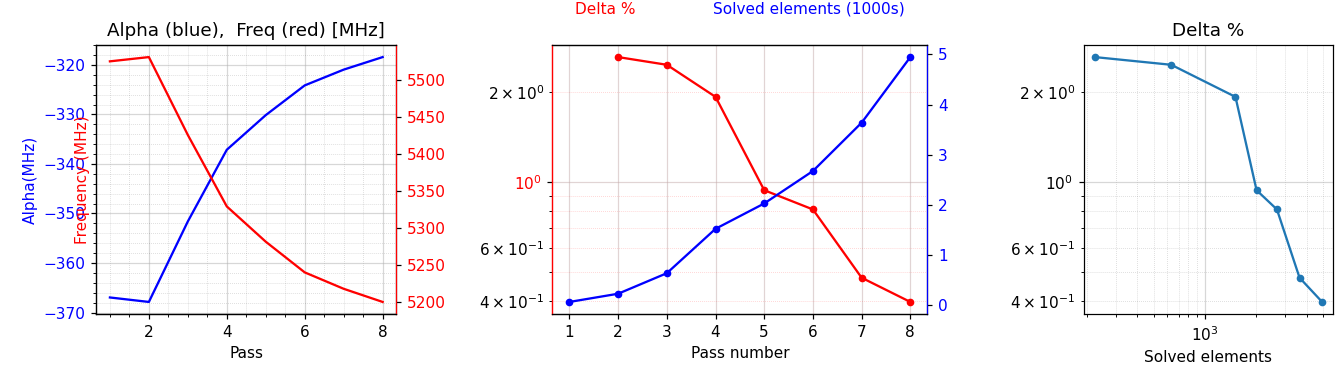

In [26]:
c1.plot_convergence_chi()

ocuments\github\qiskit-metal\qiskit_metal\_gui\styles\metal_dark\rc\transparent.pngING: Could not create pixmap from c:\users\user

ocuments\github\qiskit-metal\qiskit_metal\_gui\styles\metal_dark\rc\transparent.pngING: Could not create pixmap from c:\users\user

ocuments\github\qiskit-metal\qiskit_metal\_gui\styles\metal_dark\rc\transparent.pngING: Could not create pixmap from c:\users\user

ocuments\github\qiskit-metal\qiskit_metal\_gui\styles\metal_dark\rc\transparent.pngING: Could not create pixmap from c:\users\user



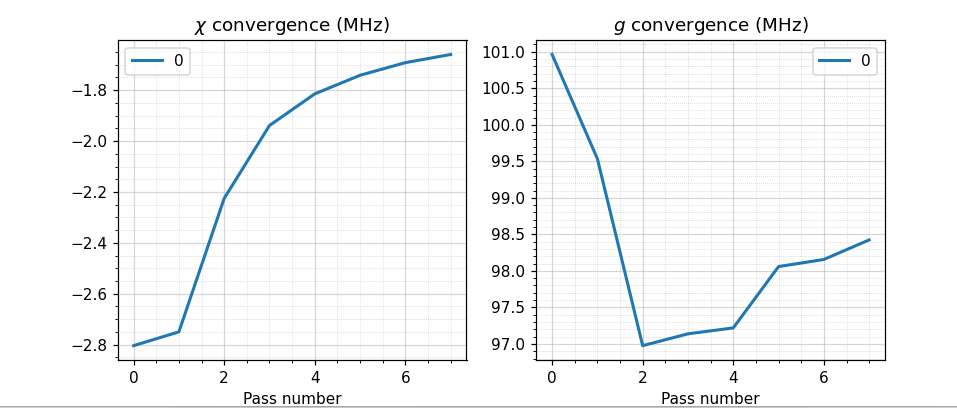

# method (2): Energy Participation Ratio (EPR)

Based on the canonical quantization of an arbitrary electrical circuit (ZK Minev *et al.*, "Energy-participation quantization of Josephson circuits," *npj Quantum Inf.,* **7**, 131 (2021) DOI: https://doi.org/10.1038/s41534-021-00461-8), we can extract the qubit parameters from eigenmode FEM simulations.

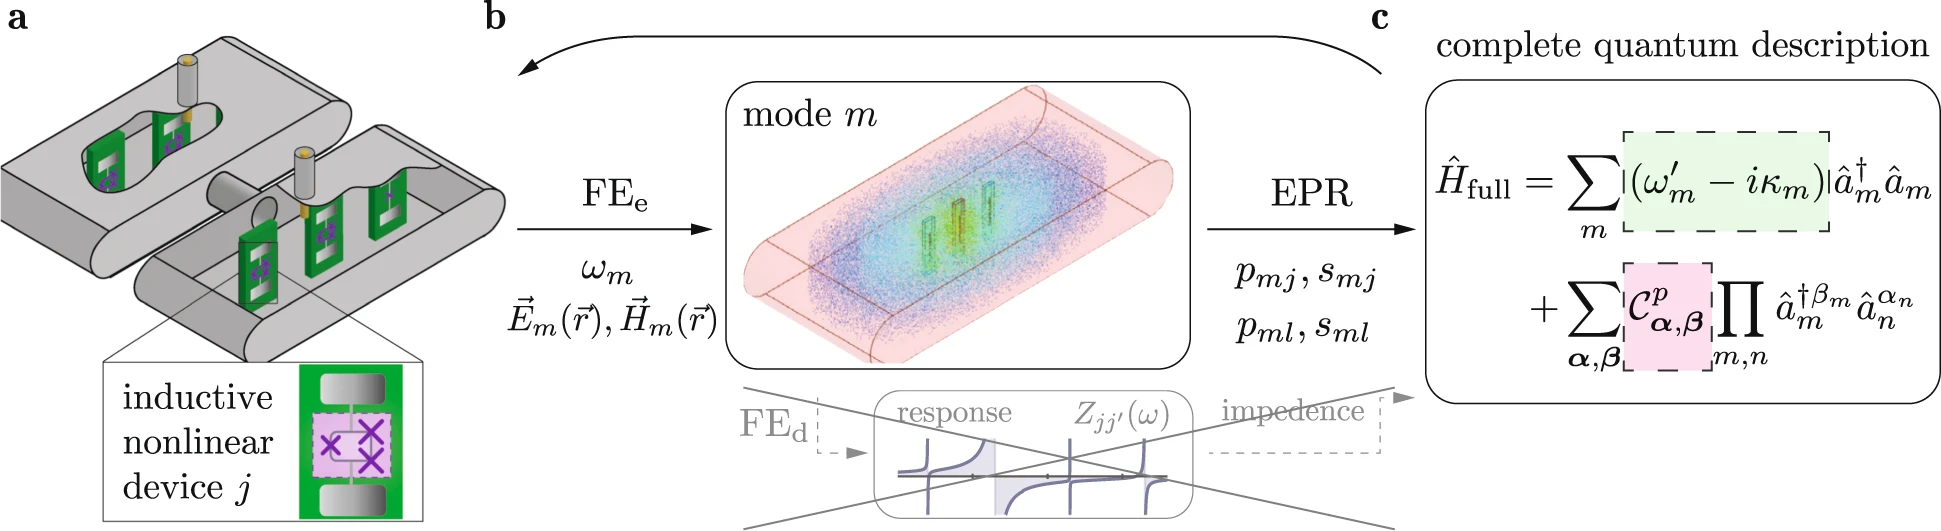

In [17]:
from qiskit_metal.analyses.quantization import EPRanalysis

# project name
proj_name = "lab02_floating_transmon"

eig_s = EPRanalysis(design, "hfss")
hfss = eig_s.sim.renderer

try:
    hfss.start()
except:
    hfss.activate_design(proj_name)

INFO 12:34PM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:34PM [load_ansys_project]: 	Opened Ansys App
INFO 12:34PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 12:34PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/USER/Documents/Ansoft/
	Project:   Project1
INFO 12:34PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 12:34PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 12:34PM [connect]: 	Connected to project "Project1" and design "Design_q3d" 😀 



Identify the non-linear (Josephson) junctions in the model. You will need to list the junctions in the epr setup.

In this case there's only one junction, namely 'jj'. Let's see what we need to change in the default setup.

The name of the `Lj_variable` and `Cj_variable` match with our model. However it is missing the names of the shapes that identify the junction (`rect` and `line`). Look for those in the renderer and find the name. Then let's change the name (See below).

In [18]:
from qiskit_metal.analyses.quantization import EPRanalysis

# define the EPR analysis class
eig_s = EPRanalysis(design, "hfss")

# define the renderer program for the eigenmode simulation
hfss = eig_s.sim.renderer

# try-except to avoid common(?) error during the HFSS rendering
try:
    hfss.start()
except:
    hfss.activate_design(proj_name)

# NOTE: you should define the junction in HFSS
eig_s.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_s.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'

# define the setup
em_s = eig_s.sim.setup
em_s.name = "setup_custom"

# minimum searching frequency
em_s.min_freq_ghz = 3

# target eigenmode number
em_s.n_modes = 1

# maximum pass number
em_s.max_passes = 15

# criteria for eigenmode simulation convergence: maximum delta F_eigen between passes < value
em_s.max_delta_f = 0.3

# simulation minimum converged passes 
em_s.min_converged = 2

# simulation order 0: point, 1: line, 2: face
em_s.basis_order = 1

# Design variables can also be added in for direct simulation sweeps. Here, we have to set the junction inductance and capacitance
em_s.vars = Dict({'Lj': '12 nH', 'Cj': '2 fF'})


INFO 12:34PM [connect_project]: Connecting to Ansys Desktop API...
INFO 12:34PM [load_ansys_project]: 	Opened Ansys App
INFO 12:34PM [load_ansys_project]: 	Opened Ansys Desktop v2023.1.0
INFO 12:34PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/USER/Documents/Ansoft/
	Project:   Project1
INFO 12:34PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 12:34PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 12:34PM [connect]: 	Connected to project "Project1" and design "Design_q3d" 😀 



In [19]:
eig_s.sim._render(name=proj_name,                         # design name
                  selection = [],                         # if None --> all
                  solution_type='eigenmode',              # NOTE: case sensitive
                  vars_to_initialize=em_s.vars,           # set variables
                  open_pins=[('Q1', 'readout')],          # set open pins
                  port_list=[],                           # set ports, for eigenmode simulations --> R = 50 Ohm boundary conditions 
                  box_plus_buffer = False)                # if False --> set the overall layout as you defined above. If True --> set marginal chip sizes as you set here.

INFO 12:34PM [connect_design]: 	Opened active design
	Design:    lab02_floating_transmon_hfss [Solution type: Eigenmode]


'lab02_floating_transmon_hfss'

## set mesh configurations

In [20]:
# mesh setting name, components, maximum mesh length
hfss.modeler.mesh_length('qubitpad_mesh_setting', ['pad_bot_Q1', 'pad_top_Q1', 'readout_connector_pad_Q1'], MaxLength='0.02 mm')

## start eigenmode simulation

In [21]:
eig_s.sim._analyze()

INFO 12:34PM [get_setup]: 	Opened setup `setup_custom`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 12:34PM [analyze]: Analyzing setup setup_custom
12:37PM 20s INFO [get_f_convergence]: Saved convergences to c:\Users\USER\Documents\GitHub\sqc_lecture_notes\tutorials\hfss_eig_f_convergence.csv


## validate the project information

In [23]:
pinfo = hfss.pinfo
pinfo.junctions['jj'] = {'Lj_variable': 'Lj', 'rect': 'JJ_rect_Lj_Q1_rect_jj', 'line': 'JJ_Lj_Q1_rect_jj_',  'Cj_variable': 'Cj'}
pinfo.validate_junction_info() # Check that valid names of variables and objects have been supplied

## DO EPR analysis! (perturbation theory)

In [24]:
eprd = epr.DistributedAnalysis(pinfo)
eprd.do_EPR_analysis()

Design "lab02_floating_transmon_hfss" info:
	# eigenmodes    1
	# variations    1

Variation 0  [1/1]

  Mode 0 at 5.36 GHz   [1/1]
    Calculating ℰ_magnetic,ℰ_electric
       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.6%  8.265e-25 3.582e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 97.35%
	jj               1.02286  (+)        0.0278537
		(U_tot_cap-U_tot_ind)/mean=0.03%

ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project1\lab02_floating_transmon_hfss\2025-01-20 12-38-18.npz




(WindowsPath('C:/data-pyEPR/Project1/lab02_floating_transmon_hfss/2025-01-20 12-38-18.npz'),
 ['0'])

## Do EPR analysis! (numerical diagonalization of the Hamiltonian)

#### NOTE: `cos_trunc`: truncated order for a cosine potential of a Josephson junction and `Fock_trunc`: truncated order for an oscillator   
#### NOTE: `PT`: Perturbation theory and `ND`: Numerical diagonalization

In [25]:
epra = epr.QuantumAnalysis(eprd.data_filename)
epra.analyze_all_variations(cos_trunc = 8, fock_trunc = 10)

WARNING 12:38PM [__init__]: <p>Error: <class 'IndexError'></p>


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.000644
dtype: float64

Pm_norm idx =
     jj
0  True
*** P (participation matrix, not normlz.)
         jj
0  0.995141

*** S (sign-bit matrix)
   s_jj
0    -1
*** P (participation matrix, normalized.)
         1

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       262

*** Chi matrix ND (MHz) 
       299

*** Frequencies O1 PT (MHz)
0    5099.508196
dtype: float64

*** Frequencies ND (MHz)
0    5084.828113
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0]


OrderedDict([('0',
              OrderedDict([('f_0', 0    5361.025191
                            Name: 0, dtype: float64),
                           ('f_1', 0    5099.508196
                            dtype: float64),
                           ('f_ND',
                            0    5084.828113
                            dtype: float64),
                           ('chi_O1',
                                        0
                            0  261.516995),
                           ('chi_ND',
                                        0
                            0  298.591243),
                           ('ZPF', array([[-0.4426637]])),
                           ('Pm_normed', array([[0.99578192]])),
                           ('Pm_raw',
                            0    0.995141
                            Name: jj, dtype: float64),
                           ('_Pm_norm',
                            modes
                            0    1.000644
                            d

INFO 12:40PM [__del__]: Disconnected from Ansys HFSS


# LAB HOMEWORK

### Transmon qubit (floating type; double pad geometry) simulations. You should achieve the target parameters within 3\%. The overall circuit layout, electric field distribution, and the convergence plot vs. adaptive pass should be attached to the report.

1. Analyze the variations of qubit frequency by increasing (or decreasing) `pad_width`, `pad_height` and `pad_gap` of a double pad geometry. You should analyze the qubit frequency with `LOM` and `EPR` methods.
2. Design a double pad qubit to have $\omega_q/2\pi=4.5$ GHz with `pad_width = 525 μm`, `pad_height = 90 μm`, `pad_gap = 30 μm`, `pocket_height = 650 μm`, `pocket_width = 650 μm` from the `LOM` method. You may change the Junction inductance $L_J$ of a qubit.
3. Design a double pad qubit to have $\omega_q/2\pi=4.5$ GHz with `pad_width = 525 μm`, `pad_height = 90 μm`, `pad_gap = 30 μm`, `pocket_height = 650 μm`, `pocket_width = 650 μm` from the `EPR` method. You may change the Junction inductance $L_J$ of a qubit.
4. (Discussions) Even though the assumptions are identical, the LOM and EPR methods exhibit slightly different qubit parameters. Which one do you think is reliable? Why do you think so?